## 📌 College Placement Prediction — Project Overview

## 🧩 Problem Statement
The objective of this project is to build a **Logistic Regression Model** to predict whether a student will get **Placed** or not based on their academic profile, technical skills, and personal attributes.

---

## 📊 Dataset Information

## 🏷️ Dataset Name  
College Placement Dataset

## 🌐 Source  
College_Placement.csv (User Uploaded)

---

## 📐 Dataset Shape
- **Total Rows:** 500  
- **Total Columns:** 10  

---

## 🧬 Dataset Columns
- **College_ID** – Unique identifier for each student  
- **IQ** – Intelligence Quotient score  
- **Prev_Sem_Result** – Result/Percentage of the previous semester  
- **CGPA** – Cumulative Grade Point Average  
- **Academic_Performance** – Performance rating (Scale 1-10)  
- **Internship_Experience** – Whether the student has internship experience (Yes/No)  
- **Extra_Curricular_Score** – Score based on non-academic activities  
- **Communication_Skills** – Rating of verbal and written skills  
- **Projects_Completed** – Number of academic/personal projects finished  
- **Placement** – **Target Label** (Yes = Placed, No = Not Placed)

---

## 🎯 Features and Target Used in This Project

## 🔹 Features (X)
We will focus on the following key predictors:
- IQ, CGPA, and Previous Semester Results
- Internship Experience (Label Encoded)
- Communication Skills and Projects Completed

## 🎯 Target (y)
- **Placement** (Binary Class: 0 for No, 1 for Yes)

---

## 📚 Steps We Will Perform

1. **Load Dataset:** Import the CSV file into a Pandas DataFrame.
2. **Data Cleaning:** Check for missing values and duplicates.
3. **Encoding:** Convert categorical text (Internship, Placement) into numerical format.
4. **Feature Selection:** Selecting relevant columns for the Logistic Regression model.
5. **Model Training:** Implement the **Logistic Regression** algorithm.
6. **Evaluation:** Analyze the model using a Confusion Matrix and Accuracy Score.
7. **Prediction:** Test the model with new sample data.

---

#### import some of the library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ydata_profiling import ProfileReport

#### Load the dataset

In [3]:
df=pd.read_csv("CollegePlacement.csv")

In [4]:
df

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0       CLG0030  107             6.61  6.28                     8   
1       CLG0061   97             5.52  5.37                     8   
2       CLG0036  109             5.36  5.83                     9   
3       CLG0055  122             5.47  5.75                     6   
4       CLG0004   96             7.91  7.69                     7   
...         ...  ...              ...   ...                   ...   
9995    CLG0021  119             8.41  8.29                     4   
9996    CLG0098   70             9.25  9.34                     7   
9997    CLG0066   89             6.08  6.25                     3   
9998    CLG0045  107             8.77  8.92                     3   
9999    CLG0060  109             9.41  9.77                     8   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                       No                       8                     8   
1                       No                       7                     8   
2                       No                       3                     1   
3                      Yes                       1                     6   
4                       No                       8                    10   
...                    ...                     ...                   ...   
9995                    No                       1                     8   
9996                    No                       0                     7   
9997                   Yes                       3                     9   
9998                    No                       7                     5   
9999                    No                       3                     5   

      Projects_Completed Placement  
0                      4        No  
1                      0        No  
2                      1        No  
3                      1        No  
4                      2        No  
...                  ...       ...  
9995                   0       Yes  
9996                   2        No  
9997                   5        No  
9998                   1        No  
9999                   5        No  

[10000 rows x 10 columns]

#### Analysis part

In [7]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.17it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
### check the the total null value 

In [12]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [13]:
### there are no missing value in the dataset 

In [14]:
df

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0       CLG0030  107             6.61  6.28                     8   
1       CLG0061   97             5.52  5.37                     8   
2       CLG0036  109             5.36  5.83                     9   
3       CLG0055  122             5.47  5.75                     6   
4       CLG0004   96             7.91  7.69                     7   
...         ...  ...              ...   ...                   ...   
9995    CLG0021  119             8.41  8.29                     4   
9996    CLG0098   70             9.25  9.34                     7   
9997    CLG0066   89             6.08  6.25                     3   
9998    CLG0045  107             8.77  8.92                     3   
9999    CLG0060  109             9.41  9.77                     8   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                       No                       8                     8   
1                       No                       7                     8   
2                       No                       3                     1   
3                      Yes                       1                     6   
4                       No                       8                    10   
...                    ...                     ...                   ...   
9995                    No                       1                     8   
9996                    No                       0                     7   
9997                   Yes                       3                     9   
9998                    No                       7                     5   
9999                    No                       3                     5   

      Projects_Completed Placement  
0                      4        No  
1                      0        No  
2                      1        No  
3                      1        No  
4                      2        No  
...                  ...       ...  
9995                   0       Yes  
9996                   2        No  
9997                   5        No  
9998                   1        No  
9999                   5        No  

[10000 rows x 10 columns]

### two column contain the maximum of the zeros
#### 1. Extra_Curricular_Score
#### 2. Projects_Completed

### so fill the zero to the its mean

In [16]:
df['Extra_Curricular_Score']=df['Extra_Curricular_Score'].replace(0,df['Extra_Curricular_Score'].mean())

In [17]:
df['Projects_Completed']=df['Projects_Completed'].fillna(df['Projects_Completed'].mean())

### now check zero is present or not

In [19]:
np.sum(df['Extra_Curricular_Score'] == 0)

0

# The main part is ,I use the 1 vs 1 so replace the NO->0 and Yes->1

In [21]:
df['Placement']=df['Placement'].replace('Yes',1)

In [22]:
df['Placement']=df['Placement'].replace('No',0)

In [23]:
df

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0       CLG0030  107             6.61  6.28                     8   
1       CLG0061   97             5.52  5.37                     8   
2       CLG0036  109             5.36  5.83                     9   
3       CLG0055  122             5.47  5.75                     6   
4       CLG0004   96             7.91  7.69                     7   
...         ...  ...              ...   ...                   ...   
9995    CLG0021  119             8.41  8.29                     4   
9996    CLG0098   70             9.25  9.34                     7   
9997    CLG0066   89             6.08  6.25                     3   
9998    CLG0045  107             8.77  8.92                     3   
9999    CLG0060  109             9.41  9.77                     8   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                       No                  8.0000                     8   
1                       No                  7.0000                     8   
2                       No                  3.0000                     1   
3                      Yes                  1.0000                     6   
4                       No                  8.0000                    10   
...                    ...                     ...                   ...   
9995                    No                  1.0000                     8   
9996                    No                  4.9709                     7   
9997                   Yes                  3.0000                     9   
9998                    No                  7.0000                     5   
9999                    No                  3.0000                     5   

      Projects_Completed Placement  
0                      4         0  
1                      0         0  
2                      1         0  
3                      1         0  
4                      2         0  
...                  ...       ...  
9995                   0         1  
9996                   2         0  
9997                   5         0  
9998                   1         0  
9999                   5         0  

[10000 rows x 10 columns]

### Now select the feature and label column

In [25]:
x=df[["IQ","Prev_Sem_Result","CGPA","Academic_Performance",'Extra_Curricular_Score','Communication_Skills','Projects_Completed']]

In [26]:
y=df[['Placement']]

In [27]:
x

IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0     107             6.61  6.28                     8   
1      97             5.52  5.37                     8   
2     109             5.36  5.83                     9   
3     122             5.47  5.75                     6   
4      96             7.91  7.69                     7   
...   ...              ...   ...                   ...   
9995  119             8.41  8.29                     4   
9996   70             9.25  9.34                     7   
9997   89             6.08  6.25                     3   
9998  107             8.77  8.92                     3   
9999  109             9.41  9.77                     8   

      Extra_Curricular_Score  Communication_Skills  Projects_Completed  
0                     8.0000                     8                   4  
1                     7.0000                     8                   0  
2                     3.0000                     1                   1  
3                     1.0000                     6                   1  
4                     8.0000                    10                   2  
...                      ...                   ...                 ...  
9995                  1.0000                     8                   0  
9996                  4.9709                     7                   2  
9997                  3.0000                     9                   5  
9998                  7.0000                     5                   1  
9999                  3.0000                     5                   5  

[10000 rows x 7 columns]

In [28]:
y

Placement
0            0
1            0
2            0
3            0
4            0
...        ...
9995         1
9996         0
9997         0
9998         0
9999         0

[10000 rows x 1 columns]

<Axes: >

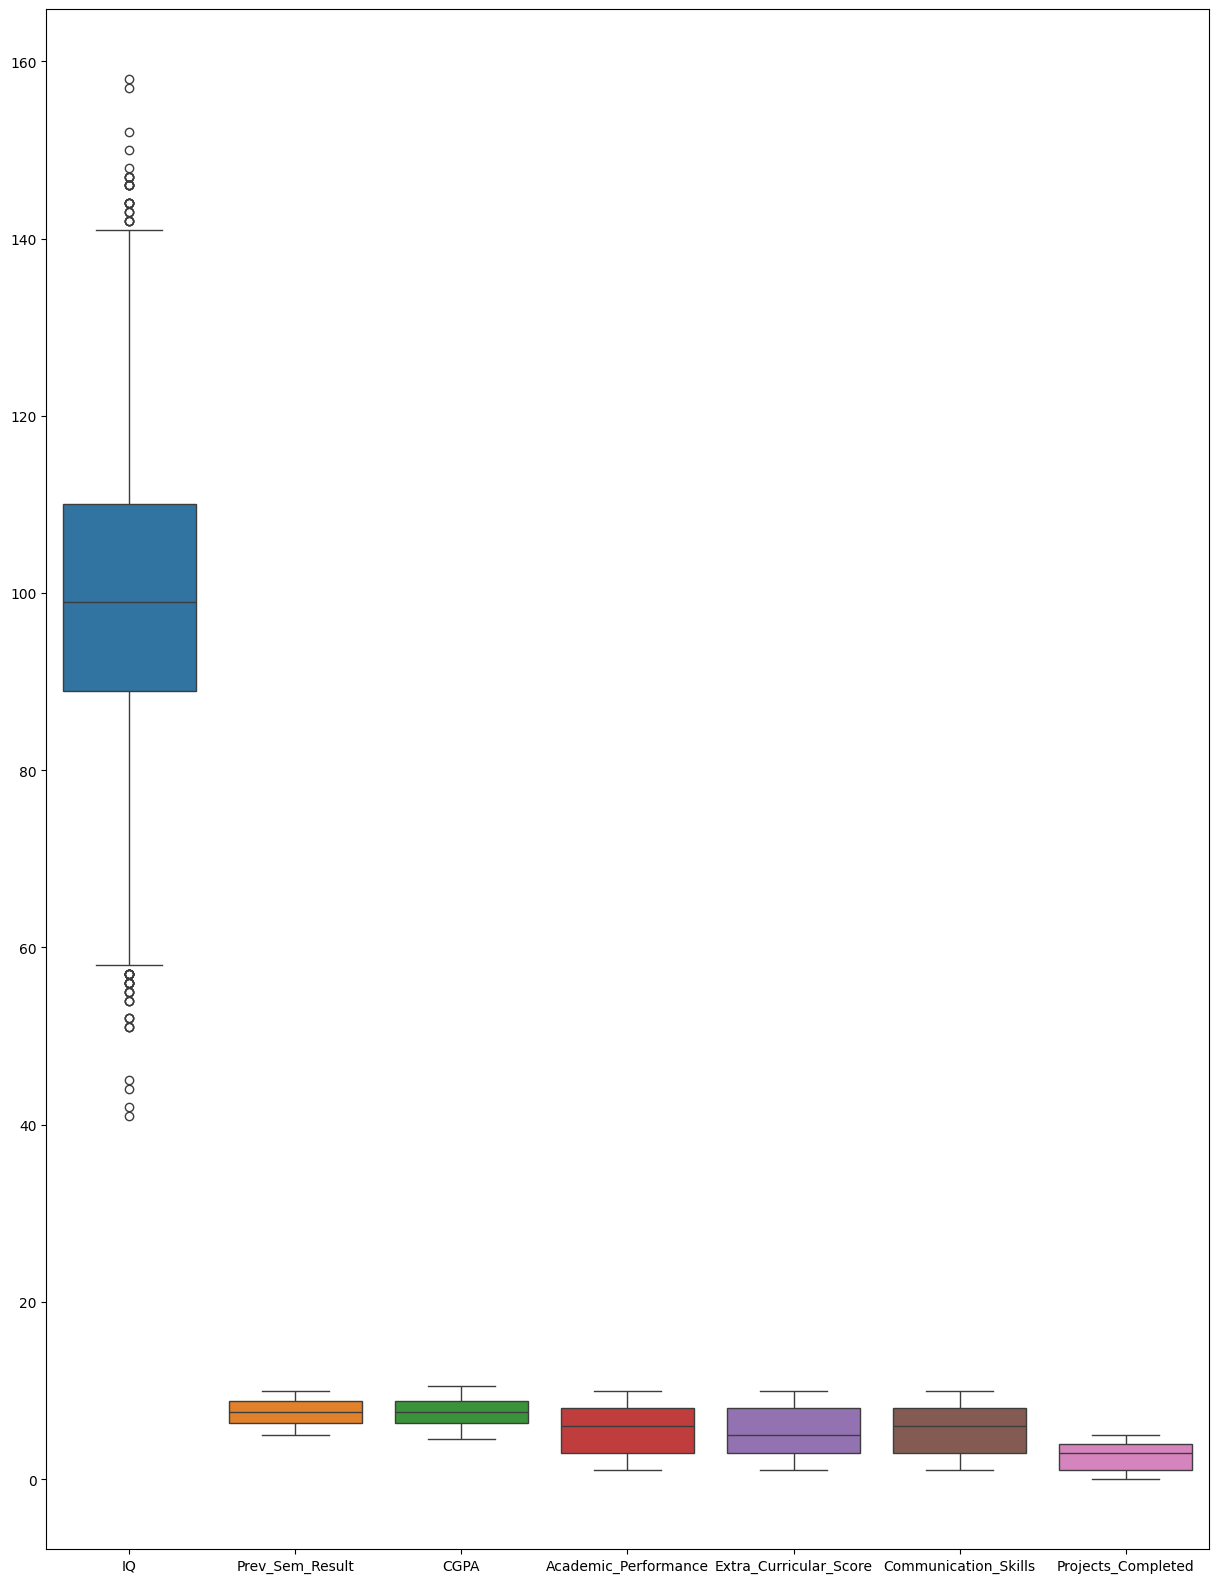

In [29]:
figs,ax=plt.subplots(figsize=(15,20))
sns.boxplot(data=x,ax=ax)

## The IQ column present the more of the outliers so fix this data into 1-100

In [31]:
x['IQ'].max()

158

In [32]:
x['IQ'].min()

41

In [33]:
from sklearn.preprocessing import MinMaxScaler
CAPPING_MAX_IQ = 15
scaler_min_max = MinMaxScaler(feature_range=(1, 100))
x['IQ'] = scaler_min_max.fit_transform(np.clip(x[['IQ']], a_min=41, a_max=CAPPING_MAX_IQ))

C:\Users\subod\AppData\Local\Temp\ipykernel_17624\696488162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['IQ'] = scaler_min_max.fit_transform(np.clip(x[['IQ']], a_min=41, a_max=CAPPING_MAX_IQ))


In [49]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
x['IQ'] = robust_scaler.fit_transform(df[['IQ']])

C:\Users\subod\AppData\Local\Temp\ipykernel_17624\2130591622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['IQ'] = robust_scaler.fit_transform(df[['IQ']])


In [50]:
x

IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0     0.380952             6.61  6.28                     8   
1    -0.095238             5.52  5.37                     8   
2     0.476190             5.36  5.83                     9   
3     1.095238             5.47  5.75                     6   
4    -0.142857             7.91  7.69                     7   
...        ...              ...   ...                   ...   
9995  0.952381             8.41  8.29                     4   
9996 -1.380952             9.25  9.34                     7   
9997 -0.476190             6.08  6.25                     3   
9998  0.380952             8.77  8.92                     3   
9999  0.476190             9.41  9.77                     8   

      Extra_Curricular_Score  Communication_Skills  Projects_Completed  
0                     8.0000                     8                   4  
1                     7.0000                     8                   0  
2                     3.0000                     1                   1  
3                     1.0000                     6                   1  
4                     8.0000                    10                   2  
...                      ...                   ...                 ...  
9995                  1.0000                     8                   0  
9996                  4.9709                     7                   2  
9997                  3.0000                     9                   5  
9998                  7.0000                     5                   1  
9999                  3.0000                     5                   5  

[10000 rows x 7 columns]

<Axes: >

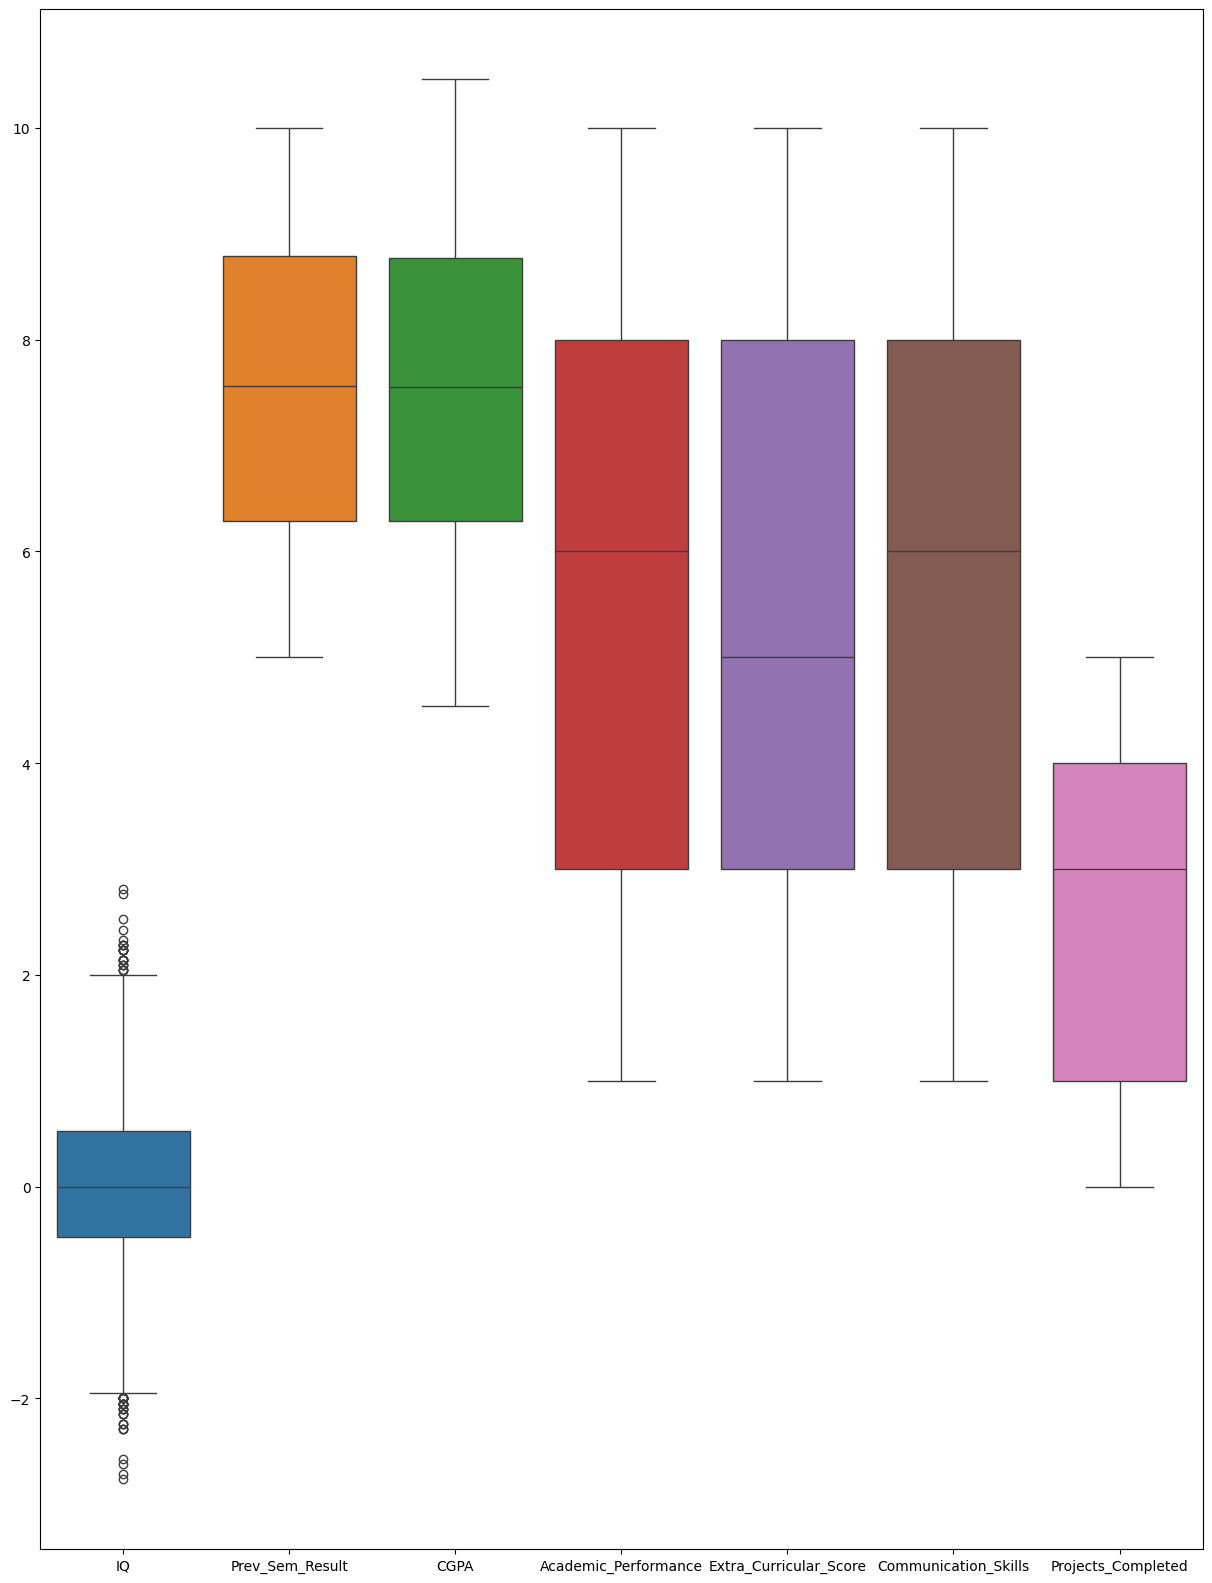

In [57]:
figs,ax=plt.subplots(figsize=(15,20))
sns.boxplot(data=x,ax=ax)

In [58]:
x

IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0     0.380952             6.61  6.28                     8   
1    -0.095238             5.52  5.37                     8   
2     0.476190             5.36  5.83                     9   
3     1.095238             5.47  5.75                     6   
4    -0.142857             7.91  7.69                     7   
...        ...              ...   ...                   ...   
9995  0.952381             8.41  8.29                     4   
9996 -1.380952             9.25  9.34                     7   
9997 -0.476190             6.08  6.25                     3   
9998  0.380952             8.77  8.92                     3   
9999  0.476190             9.41  9.77                     8   

      Extra_Curricular_Score  Communication_Skills  Projects_Completed  
0                     8.0000                     8                   4  
1                     7.0000                     8                   0  
2                     3.0000                     1                   1  
3                     1.0000                     6                   1  
4                     8.0000                    10                   2  
...                      ...                   ...                 ...  
9995                  1.0000                     8                   0  
9996                  4.9709                     7                   2  
9997                  3.0000                     9                   5  
9998                  7.0000                     5                   1  
9999                  3.0000                     5                   5  

[10000 rows x 7 columns]

In [59]:
df['IQ']

0       107
1        97
2       109
3       122
4        96
       ... 
9995    119
9996     70
9997     89
9998    107
9999    109
Name: IQ, Length: 10000, dtype: int64

### when i select the IQ column then there are much outlier present in this coulumn so remove the IQ column in the feature column

In [134]:
x=df[["Prev_Sem_Result","CGPA","Academic_Performance",'Extra_Curricular_Score','Communication_Skills','Projects_Completed']]

In [136]:
x

Prev_Sem_Result  CGPA  Academic_Performance  Extra_Curricular_Score  \
0                6.61  6.28                     8                  8.0000   
1                5.52  5.37                     8                  7.0000   
2                5.36  5.83                     9                  3.0000   
3                5.47  5.75                     6                  1.0000   
4                7.91  7.69                     7                  8.0000   
...               ...   ...                   ...                     ...   
9995             8.41  8.29                     4                  1.0000   
9996             9.25  9.34                     7                  4.9709   
9997             6.08  6.25                     3                  3.0000   
9998             8.77  8.92                     3                  7.0000   
9999             9.41  9.77                     8                  3.0000   

      Communication_Skills  Projects_Completed  
0                        8                   4  
1                        8                   0  
2                        1                   1  
3                        6                   1  
4                       10                   2  
...                    ...                 ...  
9995                     8                   0  
9996                     7                   2  
9997                     9                   5  
9998                     5                   1  
9999                     5                   5  

[10000 rows x 6 columns]

In [142]:
y=df.Placement

In [144]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Placement, Length: 10000, dtype: object

<Axes: >

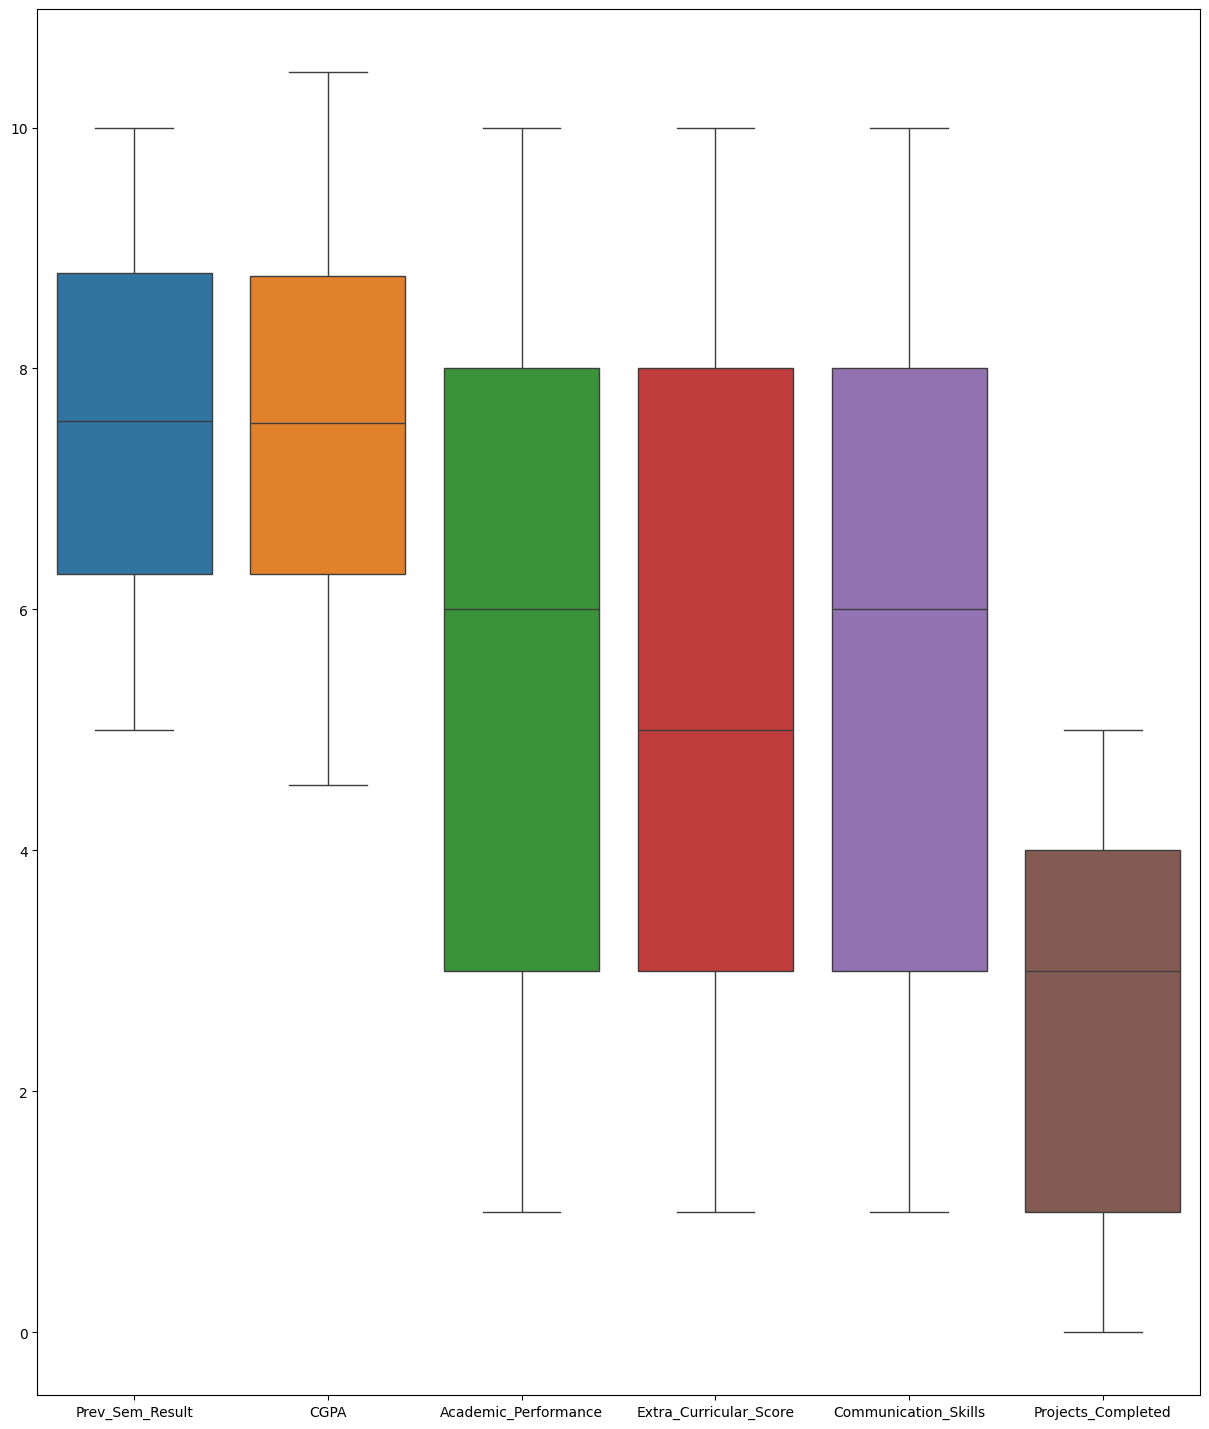

In [146]:
figs,ax=plt.subplots(figsize=(15,18))
sns.boxplot(data=x,ax=ax)

### Now preprocess the data

In [149]:
scaler=StandardScaler()

In [151]:
ProfileReport(pd.DataFrame(scaler.fit_transform(x)))
x_scaled=scaler.fit_transform(x)

### check the multicollinearity present or not in the feature column

In [154]:
def vif_score(x):
    scaler=StandardScaler()
    arr=scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i],variance_inflation_factor(arr,i)]for i in range(arr.shape[1])],columns=["Feature","vif"])

In [156]:
vif_score(x)

Feature        vif
0         Prev_Sem_Result  26.262241
1                    CGPA  26.266319
2    Academic_Performance   1.000838
3  Extra_Curricular_Score   1.000406
4    Communication_Skills   1.000775
5      Projects_Completed   1.000815

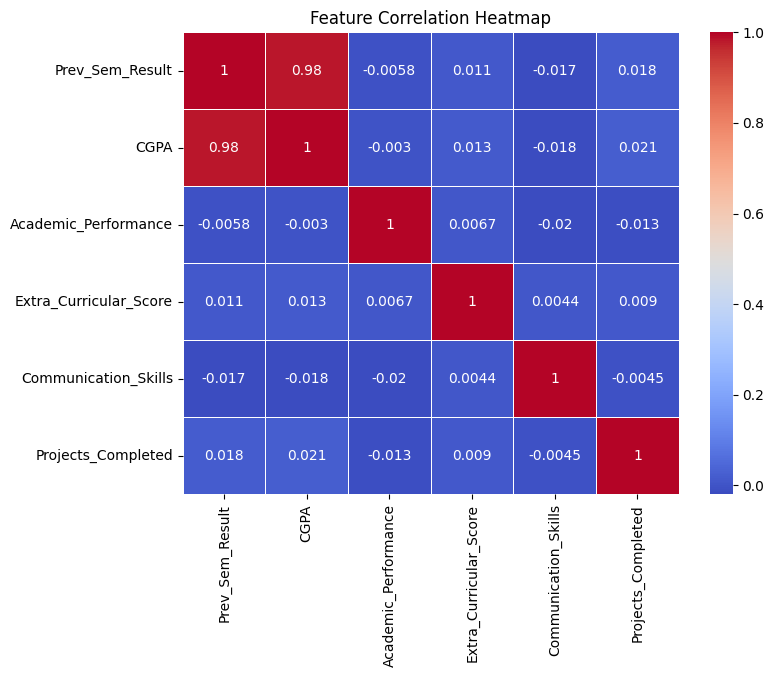

In [158]:
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Two column [Prev_Sem_Result,CGPA] both column present the much more relation to the other column that is presnt the multicollinearity but no matter

## Now train Test and split the data 

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=500)

In [164]:
x_train

array([[ 0.43132995,  0.44053828, -0.53819017,  0.57319882,  0.1510659 ,
        -1.46479365],
       [-0.92277887, -0.63424232, -1.23424575, -1.25541594,  1.18529163,
        -0.88199997],
       [ 1.40545925,  1.37927071,  1.20194877,  1.30464473,  1.53003354,
        -0.88199997],
       ...,
       [-0.90205271, -1.12401576,  1.54997655,  0.57319882,  0.49580781,
        -0.29920628],
       [ 0.48659969,  0.82147318, -0.19016238,  1.67036768,  1.18529163,
         1.44917478],
       [-1.63437687, -1.39611211,  1.54997655, -1.62113889, -0.88315982,
        -0.29920628]])

In [166]:
x_test

array([[ 1.44000284,  1.17519844,  0.50589319, -1.25541594, -0.53841791,
        -0.88199997],
       [-0.00391932, -0.26691224,  1.20194877, -0.16888962, -1.57264364,
         1.44917478],
       [ 1.57126849,  1.46770202, -0.19016238, -0.88969298,  0.49580781,
         0.86638109],
       ...,
       [-0.6326127 , -0.77029049,  0.85392098,  1.67036768, -1.22790173,
        -0.29920628],
       [-0.35626396, -0.41656523, -0.53819017, -0.88969298, -1.22790173,
        -1.46479365],
       [-0.06609778,  0.18884916,  1.20194877, -1.25541594,  0.49580781,
        -0.88199997]])

In [168]:
y_train

1939    0
5419    0
9288    0
5184    0
6388    1
       ..
4383    0
3005    1
3790    0
8465    1
951     0
Name: Placement, Length: 7500, dtype: object

In [170]:
y_test

5503    0
6376    0
3861    0
1308    0
6380    0
       ..
9035    0
911     0
8207    0
4569    0
215     0
Name: Placement, Length: 2500, dtype: object

### model create

In [177]:
# 1. Convert to numpy array, ravel to 1-D
y_clean = np.array(y_train).ravel()

# 2. Force numeric type (int) — this fixes dtype=object issue
y_clean = y_clean.astype(int)

print("y_clean shape:", y_clean.shape)
print("unique values:", np.unique(y_clean))
print("dtype:", y_clean.dtype)

# 3. Now fit the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_clean)
print("Model trained successfully!")

y_clean shape: (7500,)
unique values: [0 1]
dtype: int32
Model trained successfully!


### check the model score

In [225]:
import numpy as np

y_test_clean = np.array(y_test).ravel().astype(int)  # clean y_test

# Use pipeline score
score = loaded_pipeline.score(x_test, y_test_clean)

print(f"Model Accuracy on Test Set: {score*100:.2f}%")


Model Accuracy on Test Set: 88.20%


In [231]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = loaded_pipeline.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test_clean, y_pred))
print("\nClassification Report:\n", classification_report(y_test_clean, y_pred))


Confusion Matrix:
 [[2008   66]
 [ 229  197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2074
           1       0.75      0.46      0.57       426

    accuracy                           0.88      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.87      0.88      0.87      2500



### prediction

In [211]:
# Direct prediction with trained model
pred_class = model.predict(x_test[[0]])
pred_prob = model.predict_proba(x_test[[0]])

print("Predicted class:", pred_class[0])
print("Probability of each class:", pred_prob[0])

Predicted class: 0
Probability of each class: [0.91921903 0.08078097]


### Use the Pipeline to scale+model

In [ ]:
from sklearn.pipeline import Pipeline
import pickle

# Fit scaler + model in pipeline
final_pipeline = Pipeline([
    ("scaler", scaler),
    ("model", model)
])

final_pipeline.fit(x_train, y_clean)

# Save pipeline
with open('placement_prediction.pickle', 'wb') as f:
    pickle.dump(final_pipeline, f)

print("Model saved as placement_prediction.pickle")

Model saved as placement_prediction.pickle


### Load model and predict

In [221]:
import pickle
import numpy as np

# Load saved pipeline
file_name = 'placement_prediction.pickle'
with open(file_name, 'rb') as file:
    loaded_pipeline = pickle.load(file)
# input
# Order: Prev_Sem_Result, CGPA, Academic_Performance, Extra_Curricular_Score, Communication_Skills, Projects_Completed
raw_features = [[7, 8.5, 9, 6, 7, 3]]  # example row

# Predict
prediction = loaded_pipeline.predict(raw_features)

# Convert to Yes / No
prediction_text = "Yes" if prediction[0] == 1 else "No"

print("--- Prediction Result ---")
print(f"Predicted Placement: {prediction_text}")

--- Prediction Result ---
Predicted Placement: Yes
